#Models on Titanic Dataset
Prediction of the survival of a passenger 

In [54]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

In [163]:
from sklearn import tree

In [219]:
from sklearn.model_selection import cross_val_score

In [268]:
from sklearn.model_selection import GridSearchCV

Loading the train and test data

In [55]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [287]:
temp = pd.read_csv('/content/test.csv')

In [56]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S


In [57]:
test_data.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,1038,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
74,966,1,"Geiger, Miss. Amalie",female,35.00,0,0,113503,211.5000,C130,C
220,1112,2,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,NaN,C
238,1130,2,"Hiltunen, Miss. Marta",female,18.00,1,1,250650,13.0000,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S
168,1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
13,905,2,"Howard, Mr. Benjamin",male,63.00,1,0,24065,26.0000,NaN,S
194,1086,2,"Drew, Master. Marshall Brines",male,8.00,0,2,28220,32.5000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q


In [58]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
train_data['Pclass'].unique()

array([3, 1, 2])

In [62]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [63]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [64]:
train_data.duplicated().sum(), test_data.duplicated().sum()

(0, 0)

In [65]:
train_data.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [66]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data preprossesing

In [67]:
train_data.drop(['Cabin'], axis = 1, inplace = True)

In [68]:
train_data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [69]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [70]:
train_data['Age'].fillna(train_data.groupby('Sex')['Age'].transform('mean'), inplace = True)

In [71]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [72]:
train_data['Embarked'].mode()

0    S
dtype: object

In [73]:
train_data['Embarked'].fillna('S', inplace = True)

In [74]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [75]:
test_data['Age'].fillna(test_data.groupby('Sex')['Age'].transform('mean'), inplace = True)

In [76]:
test_data.drop(['Cabin'], axis = 1, inplace = True)

In [77]:
test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('mean'), inplace = True)

In [78]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


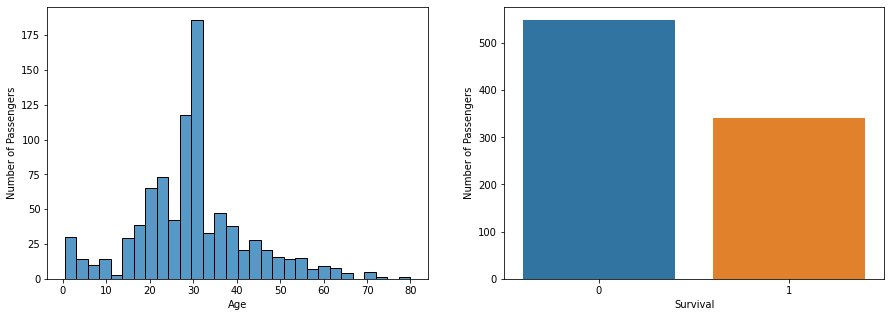

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(train_data['Age'], ax = ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Passengers')

sns.countplot(train_data['Survived'], ax = ax2)
ax2.set_xlabel('Survival')
ax2.set_ylabel('Number of Passengers')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


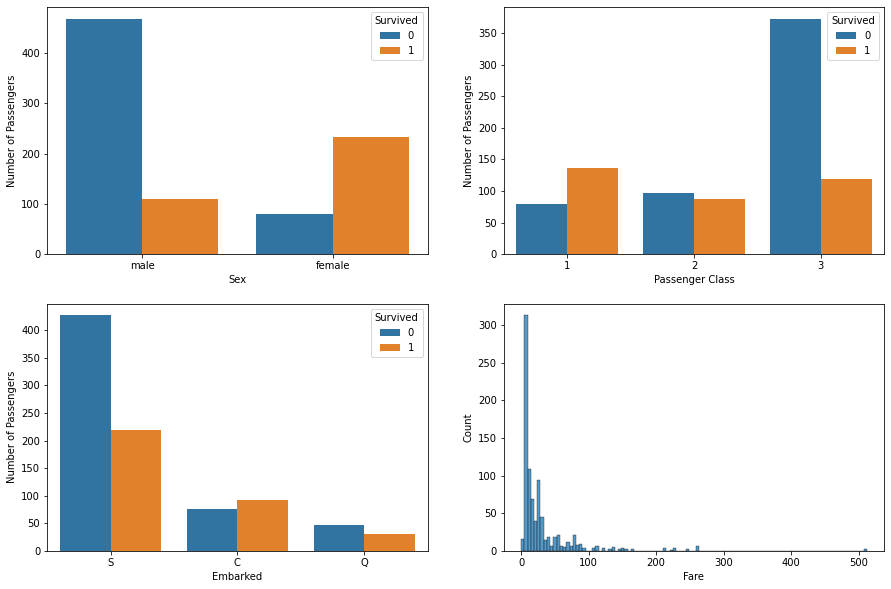

In [84]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(train_data['Sex'], hue=train_data['Survived'],  ax = ax1)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Number of Passengers')

sns.countplot(train_data['Pclass'], hue=train_data['Survived'] , ax = ax2)
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Number of Passengers')

sns.countplot(train_data['Embarked'], hue=train_data['Survived'],  ax = ax3)
ax3.set_xlabel('Embarked')
ax3.set_ylabel('Number of Passengers')

sns.histplot(train_data['Fare'], ax = ax4)

plt.show()

Feature Engineering

In [90]:
train_data['Age']=train_data['Age'].astype(int)

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [92]:
train_data['Family_member'] = train_data['SibSp'] + train_data['Parch']

In [94]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_member
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52,1,0,36947,78.2667,C,1
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30,0,0,364499,8.0500,S,0
512,513,1,1,"McGough, Mr. James Robert",male,36,0,0,PC 17473,26.2875,S,0
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19,1,1,C.A. 33112,36.7500,S,2
508,509,0,3,"Olsen, Mr. Henry Margido",male,28,0,0,C 4001,22.5250,S,0


In [98]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis = 1, inplace= True)

In [99]:
train_data.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
732,0,2,male,30,0.0000,S,0
760,0,3,male,30,14.5000,S,0
629,0,3,male,30,7.7333,Q,0
566,0,3,male,19,7.8958,S,0
195,1,1,female,58,146.5208,C,0


In [101]:
train_data['Sex'].replace({'male':0, 'female':1}, inplace = True)

In [103]:
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
0,0,3,0,22,7.2500,S,1
1,1,1,1,38,71.2833,C,1
2,1,3,1,26,7.9250,S,0
3,1,1,1,35,53.1000,S,1
4,0,3,0,35,8.0500,S,0
5,0,3,0,30,8.4583,Q,0
6,0,1,0,54,51.8625,S,0
7,0,3,0,2,21.0750,S,4
8,1,3,1,27,11.1333,S,2
9,1,2,1,14,30.0708,C,1


In [104]:
train_data['Embarked'].replace({'S':0, 'Q':1, 'C':2}, inplace = True)

In [105]:
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
0,0,3,0,22,7.2500,0,1
1,1,1,1,38,71.2833,2,1
2,1,3,1,26,7.9250,0,0
3,1,1,1,35,53.1000,0,1
4,0,3,0,35,8.0500,0,0
5,0,3,0,30,8.4583,1,0
6,0,1,0,54,51.8625,0,0
7,0,3,0,2,21.0750,0,4
8,1,3,1,27,11.1333,0,2
9,1,2,1,14,30.0708,2,1


In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    int64  
 4   Fare           891 non-null    float64
 5   Embarked       891 non-null    int64  
 6   Family_member  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [108]:
test_data['Age']= test_data['Age'].astype(int)

In [109]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 32.8+ KB


In [110]:
test_data['Family_member'] = test_data['SibSp'] + test_data['Parch']

In [111]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_member
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2


In [112]:
test_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis = 1, inplace= True)

In [113]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Family_member
0,3,male,34,7.8292,Q,0
1,3,female,47,7.0000,S,1
2,2,male,62,9.6875,Q,0
3,3,male,27,8.6625,S,0
4,3,female,22,12.2875,S,2


In [114]:
test_data['Sex'].replace({'male':0, 'female':1}, inplace = True)

In [115]:
test_data['Embarked'].replace({'S':0, 'Q':1, 'C':2}, inplace = True)

In [116]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Family_member
0,3,0,34,7.8292,1,0
1,3,1,47,7.0000,0,1
2,2,0,62,9.6875,1,0
3,3,0,27,8.6625,0,0
4,3,1,22,12.2875,0,2


In [117]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Age            418 non-null    int64  
 3   Fare           418 non-null    float64
 4   Embarked       418 non-null    int64  
 5   Family_member  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


Model Training

In [118]:
train_data.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_member
Survived,1.000000,-0.338481,0.543351,-0.078889,0.257307,0.167675,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.334571,-0.549500,-0.162098,0.065997
Sex,0.543351,-0.131900,1.000000,-0.102718,0.182333,0.108262,0.200988
Age,-0.078889,-0.334571,-0.102718,1.000000,0.091501,0.019925,-0.252151
Fare,0.257307,-0.549500,0.182333,0.091501,1.000000,0.224719,0.217138
Embarked,0.167675,-0.162098,0.108262,0.019925,0.224719,1.000000,-0.066516
Family_member,0.016639,0.065997,0.200988,-0.252151,0.217138,-0.066516,1.000000


In [119]:
feature_train = train_data.drop(['Survived'], axis = 1)
label_train = train_data['Survived']

In [122]:
feature_train.shape, label_train.shape

((891, 6), (891,))

In [222]:
logreg_acc = cross_val_score(LogisticRegression(max_iter = 200),feature_train, label_train, cv= 10, scoring= 'accuracy')

In [223]:
logreg_acc.mean()

0.7980149812734083

In [238]:
knn_acc = cross_val_score(KNeighborsClassifier(n_neighbors=3), feature_train, label_train, cv= 10, scoring= 'accuracy')

In [239]:
knn_acc.mean()

0.7295630461922598

In [240]:
nb_acc = cross_val_score(GaussianNB(), feature_train, label_train, cv= 10, scoring= 'accuracy')

In [242]:
nb_acc.mean()

0.7913108614232209

In [245]:
dt_acc = cross_val_score(DecisionTreeClassifier(max_depth=3), feature_train, label_train, cv= 10, scoring= 'accuracy')

In [247]:
dt_acc.mean()

0.8125842696629213

In [260]:
rf_acc = cross_val_score(RandomForestClassifier(n_estimators=300, max_depth = 3), feature_train, label_train, cv= 10, scoring= 'accuracy')

In [261]:
rf_acc.mean()

0.8204369538077403

In [266]:
svm_acc = cross_val_score(SVC(kernel = 'linear', C = 5, random_state= 8), feature_train, label_train, cv= 10, scoring= 'accuracy')

In [267]:
svm_acc.mean()

0.786729088639201

We can see that the model Random forest has the best accuracy.
<br>2nd best is Decision tree
<br>3rd best is Logistic regression

In [269]:
rf_params = {'n_estimators':[10, 50, 100, 200, 300, 500], 'max_depth': [3,5,7]}
rf_gs = GridSearchCV(estimator = RandomForestClassifier(random_state= 8), param_grid= rf_params, verbose = 1)

In [273]:
rf_gs.fit(feature_train, label_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300, 500]},
             verbose=1)

In [274]:
rf_gs.best_score_

0.8305379448873266

In [275]:
rf_gs.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=8)

In [276]:
rf_clf = RandomForestClassifier(max_depth=7, n_estimators=10, random_state=8)

In [277]:
rf_clf.fit(feature_train, label_train)

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=8)

In [278]:
rf_pred = rf_clf.predict(test_data)

In [279]:
dt_params = {'criterion':['gini', 'entropy', 'log_loss'], 'splitter':['best', 'random'], 'max_depth':[2,3,5,6,7,8,9]}
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state = 8), param_grid= dt_params, verbose = 1)

In [280]:
dt_gs.fit(feature_train, label_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [281]:
dt_gs.best_score_

0.8305316678174629

In [282]:
dt_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=8)

In [283]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=8)

In [284]:
dt_clf.fit(feature_train, label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=8)

In [285]:
dt_pred = dt_clf.predict(test_data)

As the gridsearch best score of Random forest with max_depth=7, n_estimators=10 is the best, we are making the submission file with the predictions by the random forest classifier.

In [288]:
submission = pd.DataFrame(data = temp['PassengerId'], columns = ['PassengerId'])

In [289]:
submission['Survived'] = rf_pred

In [291]:
submission.sample(10)

,PassengerId,Survived
253,1145,0
110,1002,0
262,1154,1
221,1113,0
403,1295,0
43,935,1
9,901,0
298,1190,0
417,1309,0
141,1033,1


In [292]:
submission.to_csv('submissionfile.csv', index = False)